In [0]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.target_names)


['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


### PCA
-  62×47 or nearly 3000 pixels ==> 150 dimension vector

In [0]:
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
pca = RandomizedPCA(n_components = 150,whiten = True,random_state = 0  )
svm = SVC(kernel = 'rbf', class_weight = 'balanced')
model = make_pipeline(pca,svm)

### split the data into a training and testing set:

In [0]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest =  train_test_split(faces.data,faces.target,random_state = 0  )


### Tuning C & Gamma using GridSearch

In [0]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C':[1,5,10,50],'svc__gamma':[0.0001,0.0005,0.001,0.005]}
grid = GridSearchCV(model,param_grid)
% time grid.fit(Xtrain,ytrain)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


CPU times: user 39.7 s, sys: 11.1 s, total: 50.9 s
Wall time: 29.5 s


### Predict the labels for the test data

In [0]:
print(grid.best_params_)
model = grid.best_estimator_
ypred = model.predict(Xtest)


{'svc__C': 5, 'svc__gamma': 0.005}


### Accuracy

In [0]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred,target_names = faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.69      0.81        16
     Colin Powell       0.87      0.85      0.86        61
  Donald Rumsfeld       0.75      0.69      0.72        35
    George W Bush       0.77      0.97      0.86       125
Gerhard Schroeder       0.86      0.66      0.75        29
      Hugo Chavez       1.00      0.68      0.81        19
Junichiro Koizumi       1.00      0.76      0.87        17
       Tony Blair       0.93      0.74      0.83        35

         accuracy                           0.83       337
        macro avg       0.90      0.76      0.81       337
     weighted avg       0.84      0.83      0.83       337




### Confision Matrix

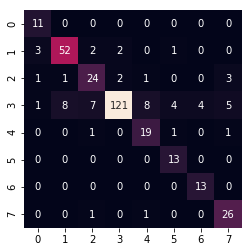

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(ytest,ypred)
sns.heatmap(mat.T,annot = True, cbar = False, square = True, fmt = 'd')

In [0]:
from sklearn import datasets
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
iris = datasets.load_iris()
X,y = iris.data, iris.target
clf = OneVsOneClassifier(LinearSVC(random_state = 0)).fit(X,y)
ypred = clf.predict(X)



/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
from sklearn.metrics import classification_report
print(classification_report(y,ypred,target_names = iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       1.00      0.94      0.97        50
   virginica       0.94      1.00      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



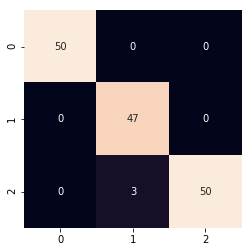

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(y,ypred)
sns.heatmap(mat.T, annot = True, fmt = 'd', square = True, cbar = False)

### Various SVM Setting

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import datasets
import numpy as np

# Initializing Classifiers
clf1 = SVC(gamma='auto')
clf2 = SVC(kernel='linear', C=1.0, class_weight='balanced')
clf3 = SVC(kernel='linear', C=1.0, decision_function_shape = 'oro')
clf4 = SVC(kernel='linear', C=1.0, decision_function_shape = 'orv')

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0,2]]
y = iris.target
X = iris.daat

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['SVM-gamma', 'SVM-linear-balanced', 'SVM-linear-oro', 'SVM-linear-ovr']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)

plt.show()